## Model-Free Reinforcement Learning

### Beyond Dynamic Programming

We explored the two primary techniques for computing optimal policies last week: value iteration and policy iteration. We modeled the environment as a Markov decision process (MDP), and we employed a transition model to describe the probability of changing states. The transition model was stored in a matrix $T$ and used to find the utility function 
$U^∗$ and the best policy $\pi^∗$.

We should be **careful** with the mathematical terminology here. The **utility function** **is** referred to as the **value function** or state-value function in Sutton and Barto's book "***Reinforcement Learning: An Introduction***" and is denoted by the letter $V$. To keep things consistent, we'll use Russel and Norvig's notation "***Artificial Intelligence: A Modern Approach***", which utilizes the letter $U$ to indicate the utility function. **The two notations are identical** and define a state's value as the expected cumulative future discounted reward starting from that state. 

### Introduction to Monte Carlo (MC) method

In model-free reinforcement learning the first thing we miss is a transition model. In fact the name model-free stands for transition-model-free. The second thing we miss is the reward function $R(s)$ giving to the agent the reward associated to a particular state. In the passive approach we have a policy $\pi$ used by the agent to move in the environment. In state $s$ the agent always produces the action $a$ given by the policy $\pi$. The goal of the agent in passive reinforcement learning is to learn the utility function $U_\pi(s)$. Sutton and Barto called this case MC for prediction. It is also possible to estimate the optimal policy while moving in the environment. In this case we are in an active case and using the words of Sutton and Burto we will say that we are applying MC for control estimation. Here, We will use again of the cleaning robot example from the previous labs but with a different setup.

<img src="https://drive.google.com/uc?id=1pXfh0nsPHni6NbqSag1VtygcyajUG0mU"/>

The robot is in a 3x4 world with an unknown transition model. The only information about the environment is the states availability. Since the robot does not have the reward function it does not know which state contains the charging station (+1) and which state contains the stairs (-1). Only in the passive case (MC for prediction) the robot has a policy that can follow to move in the world. Finally, the transition model, since the robot does not know what it is going to happen after each action it can only give unknown probabilities to each possible outcome. To summarize, in the MC for prediction case this is what we have:

* S = set of states (state-space)
* A = set of actions (action-space)
* $S_0$ = starting state
* $\pi$ = The policy


So again:

In passive reinforcement learning our objective is to use the available information to estimate the utility function. How to do it?

The first thing the robot can do is to estimate the transition model, moving in the environment and keeping track of the number of times an action has been correctly executed. Once the transition model is available the robot can use either value iteration or policy iteration to get the utility function. In this sense, there are different techniques to find out the transition model making use of Bayes rule and maximum likelihood estimation. Russel and Norvig **"Artificial Intelligence: A Modern Approach"** mentioned these techniques in chapter 21.2.2 (Bayesian reinforcement learning). The problem of this approach is evident: **estimating the values of a transition model can be expensive**. In our 3x4 world it means to estimate the values for a 12x12x4 (states x states x actions) table. **Moreover certain actions and some states can be very unlikely, making the entries in the transition table hard to estimate.** Here we will focus on another technique, able to estimate the utility function **without the transition model**, the **Monte Carlo method**.

### The Monte Carlo method

The idea behind MC is simple: just use randomness to solve a problem. For example, it is possible to use MC to estimate a multidimensional definite integral, a technique called [MC integration](https://en.wikipedia.org/wiki/Monte_Carlo_integration). 

In Reinforcement Learning we can use MC tree search to find the best move in a game. DeepMind AlphaGo defeated the Go world champion Lee Seedol using MC tree search combined with convolutional networks and deep reinforcement learning. 

The advantages of MC methods over the dynamic programming approach are the following:

- MC allows learning optimal behaviour directly from interaction with the environment.
- It is easy and efficient to focus MC methods on small subset of the states.
- MC can be used with simulations (sample models).


During the lab we will analyse the first two points. The third point is less intuitive. In many applications it is easy to simulate episodes but it can be **extremely difficult** to construct the transition model required by the dynamic programming techniques. In all these cases, MC methods rules.

Now let’s go back to our cleaning robot and let’s see what does it mean to apply the MC method to this scenario. As usual the robot starts in state (1, 1) and it follows its internal policy. At each step it records the reward obtained and saves an history of all the states visited until reaching a terminal state. We define an episode the sequence of states from the starting state to the terminal state. Let’s suppose that our robot recorded the following three episodes:

In [1]:
from IPython.display import Image
Image(url='https://drive.google.com/uc?id=1Vjvu4CoUYyvbmKId0MB0tlodqwhjGjWY', width=600)

The robot followed its internal policy but an unknown transition model perturbed the trajectory leading to undesired states. In the first and second episode, after some fluctuation the robot eventually reached the terminal state obtaining a positive reward. In the third episode the robot moved along a wrong path reaching the stairs and falling down (reward: -1.0). The following is another representation of the three episodes:

<img src="https://drive.google.com/uc?id=1lxqJs9_HvzQVtp8_jR_U23DYxBwpbMEN"/>

Each occurrence of a state during the episode is called visit. The concept of visit defines two different MC approaches:

First-Visit MC: $U_\pi(s)$ is defined as the average of the returns following the first visit to $s$ in a set of episodes.

Every-Visit MC: $U_\pi(s)$ is defined as the average of the returns following all the visit to $s$ in a set of episodes.

We will focus only on the First-Visit MC method in this lab. What does return means? The return is the sum of discounted reward. We already studied the return previously when we introduced the Bellman equation and the utility of a state history.

\begin{equation}
G(s)=\sum_{t=0}^{\infty} \gamma^t R\left(S_t\right)
\end{equation}


Nothing new. We have the discount factor 
$\gamma$, the reward function 
$R(s)$ and $S_t$ the state reached at time $t$. We can calculate the return for the state (1,1) of the first episode, with $\gamma = 0.9$, as follows:

<img src="https://drive.google.com/uc?id=1_fbsGvLD6sL6DGCTvzNz5oyuEUIWrLPZ"/>

The return for the first episode is 0.27. Following the same procedure we get the same result for the second episode. For the third episode we get a different return: -0.79. After the three episodes we came out with three different returns: 0.27, 0.27, -0.79. How can we use returns to estimate utilities? We will now introduce the core equation used in the MC method, which give the utility of a state following the policy 
$\pi$
:

\begin{equation}
U^\pi(s)=E\left[\sum_{t=0}^{\infty} \gamma^t R\left(S_t\right)\right]
\end{equation}

If you compare this equation with the equation used to calculate the return you will see only one difference: to obtain the utility function we take the expectation of the returns. That’s it. To find the utility of a state we need to calculate the expectation of the returns for that state. In our example after only three episodes the approximated utility for the state (1, 1) is: (0.27+0.27-0.79)/3=-0.08. However, an estimation based only on three episodes is **inaccurate**. We need more episodes in order to get the true value. Why do we need more episodes?

Based on the law of large numbers, repeating this process for a large numbers of times is guaranteed to converge to the true utility.

Example:
Rolling a six-sided dice produces one of the numbers 1, 2, 3, 4, 5, or 6, each with equal probability. The expectation is 3.5 and can be calculated as the arithmetic mean: (1+2+3+4+5+6)/6=3.5. Using a MC approach we can obtain the same value, let’s do it in Python:

In [2]:
import numpy as np

# Trowing a dice for N times and evaluating the expectation
dice = np.random.randint(low=1, high=7, size=3)
print("Expectation (rolling 3 times): " + str(np.mean(dice)))
dice = np.random.randint(low=1, high=7, size=10)
print("Expectation (rolling 10 times): " + str(np.mean(dice)))
dice = np.random.randint(low=1, high=7, size=100)
print("Expectation (rolling 100 times): " + str(np.mean(dice)))
dice = np.random.randint(low=1, high=7, size=1000)
print("Expectation (rolling 1000 times): " + str(np.mean(dice)))
dice = np.random.randint(low=1, high=7, size=100000)
print("Expectation (rolling 100000 times): " + str(np.mean(dice)))

Expectation (rolling 3 times): 2.0
Expectation (rolling 10 times): 3.2
Expectation (rolling 100 times): 3.59
Expectation (rolling 1000 times): 3.475
Expectation (rolling 100000 times): 3.49853


As you can see the estimation of the expectation converges to the true value of 3.5. What we are doing in MC reinforcement learning is exactly the same but in this case we want to estimate the utility of each state based on the return of each episode. Similarly to the dice, more episodes we take into account more accurate our estimation will be.

In [3]:
#Class for creating a gridworld of arbitrary size and with arbitrary obstacles.
#Each state of the gridworld should have a reward. The transition matrix is defined
#as the probability of executing an action given a command to the robot.

import numpy as np

class GridWorld:

    def __init__(self, tot_row, tot_col):
        self.action_space_size = 4
        self.world_row = tot_row
        self.world_col = tot_col
        #The world is a matrix of size row x col x 2
        #The first layer contains the obstacles
        #The second layer contains the rewards
        #self.world_matrix = np.zeros((tot_row, tot_col, 2))
        self.transition_matrix = np.ones((self.action_space_size, self.action_space_size))/ self.action_space_size
        #self.transition_array = np.ones(self.action_space_size) / self.action_space_size
        self.reward_matrix = np.zeros((tot_row, tot_col))
        self.state_matrix = np.zeros((tot_row, tot_col))
        self.position = [np.random.randint(tot_row), np.random.randint(tot_col)]

    #def setTransitionArray(self, transition_array):
        #if(transition_array.shape != self.transition_array):
            #raise ValueError('The shape of the two matrices must be the same.') 
        #self.transition_array = transition_array        

    def setTransitionMatrix(self, transition_matrix):
        '''Set the reward matrix.

        The transition matrix here is intended as a matrix which has a line
        for each action and the element of the row are the probabilities to
        executes each action when a command is given. For example:
        [[0.55, 0.25, 0.10, 0.10]
         [0.25, 0.25, 0.25, 0.25]
         [0.30, 0.20, 0.40, 0.10]
         [0.10, 0.20, 0.10, 0.60]]

        This matrix defines the transition rules for all the 4 possible actions.
        The first row corresponds to the probabilities of executing each one of
        the 4 actions when the policy orders to the robot to go UP. In this case
        the transition model says that with a probability of 0.55 the robot will
        go UP, with a probaiblity of 0.25 RIGHT, 0.10 DOWN and 0.10 LEFT.
        '''
        if(transition_matrix.shape != self.transition_matrix.shape):
            raise ValueError('The shape of the two matrices must be the same.') 
        self.transition_matrix = transition_matrix

    def setRewardMatrix(self, reward_matrix):
        '''Set the reward matrix.

        '''
        if(reward_matrix.shape != self.reward_matrix.shape):
            raise ValueError('The shape of the matrix does not match with the shape of the world.')
        self.reward_matrix = reward_matrix

    def setStateMatrix(self, state_matrix):
        '''Set the obstacles in the world.

        The input to the function is a matrix with the
        same size of the world 
        -1 for states which are not walkable.
        +1 for terminal states
         0 for all the walkable states (non terminal)
        The following matrix represents the 3x4 world
        used in the series "dissecting reinforcement learning"
        [[0,  0,  0, +1]
         [0, -1,  0, +1]
         [0,  0,  0,  0]]
        '''
        if(state_matrix.shape != self.state_matrix.shape):
            raise ValueError('The shape of the matrix does not match with the shape of the world.')
        self.state_matrix = state_matrix

    def setPosition(self, index_row=None, index_col=None):
        ''' Set the position of the robot in a specific state.

        '''
        if(index_row is None or index_col is None): self.position = [np.random.randint(tot_row), np.random.randint(tot_col)]
        else: self.position = [index_row, index_col]

    def render(self):
        ''' Print the current world in the terminal.

        O represents the robot position
        - respresent empty states.
        # represents obstacles
        * represents terminal states
        '''
        graph = ""
        for row in range(self.world_row):
            row_string = ""
            for col in range(self.world_col):
                if(self.position == [row, col]): row_string += u" \u25CB " # u" \u25CC "
                else:
                    if(self.state_matrix[row, col] == 0): row_string += ' - '
                    elif(self.state_matrix[row, col] == -1): row_string += ' # '
                    elif(self.state_matrix[row, col] == +1): row_string += ' * '
            row_string += '\n'
            graph += row_string 
        print (graph)            

    def reset(self, exploring_starts=False):
        ''' Set the position of the robot in the bottom left corner.

        It returns the first observation
        '''
        if exploring_starts:
            while(True):
                row = np.random.randint(0, self.world_row)
                col = np.random.randint(0, self.world_col)
                if(self.state_matrix[row, col] == 0): break
            self.position = [row, col]
        else:
            self.position = [self.world_row-1, 0]
        #reward = self.reward_matrix[self.position[0], self.position[1]]
        return self.position

    def step(self, action):
        ''' One step in the world.

        [observation, reward, done = env.step(action)]
        The robot moves one step in the world based on the action given.
        The action can be 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT
        @return observation the position of the robot after the step
        @return reward the reward associated with the next state
        @return done True if the state is terminal  
        '''
        if(action >= self.action_space_size): 
            raise ValueError('The action is not included in the action space.')

        #Based on the current action and the probability derived
        #from the trasition model it chooses a new actio to perform
        action = np.random.choice(4, 1, p=self.transition_matrix[int(action),:])
        #action = self.transition_model(action)

        #Generating a new position based on the current position and action
        if(action == 0): new_position = [self.position[0]-1, self.position[1]]   #UP
        elif(action == 1): new_position = [self.position[0], self.position[1]+1] #RIGHT
        elif(action == 2): new_position = [self.position[0]+1, self.position[1]] #DOWN
        elif(action == 3): new_position = [self.position[0], self.position[1]-1] #LEFT
        else: raise ValueError('The action is not included in the action space.')

        #Check if the new position is a valid position
        #print(self.state_matrix)
        if (new_position[0]>=0 and new_position[0]<self.world_row):
            if(new_position[1]>=0 and new_position[1]<self.world_col):
                if(self.state_matrix[new_position[0], new_position[1]] != -1):
                    self.position = new_position

        reward = self.reward_matrix[self.position[0], self.position[1]]
        #Done is True if the state is a terminal state
        done = bool(self.state_matrix[self.position[0], self.position[1]])
        return self.position, reward, done




Using this class it is possible to create a grid world of any size and add obstacles and terminal states. The cleaning robot will move in the grid world following a specific policy. Let’s bring to life our 3x4 world:

In [4]:
import numpy as np

# Declare our environmnet variable
# The world has 3 rows and 4 columns
env = GridWorld(3, 4)
# Define the state matrix
# Adding obstacle at position (1,1)
# Adding the two terminal states
state_matrix = np.zeros((3,4))
state_matrix[0, 3] = 1
state_matrix[1, 3] = 1
state_matrix[1, 1] = -1
# Define the reward matrix
# The reward is -0.04 for all states but the terminal
reward_matrix = np.full((3,4), -0.04)
reward_matrix[0, 3] = 1
reward_matrix[1, 3] = -1
# Define the transition matrix
# For each one of the four actions there is a probability
transition_matrix = np.array([[0.8, 0.1, 0.0, 0.1],
                              [0.1, 0.8, 0.1, 0.0],
                              [0.0, 0.1, 0.8, 0.1],
                              [0.1, 0.0, 0.1, 0.8]])
# Define the policy matrix
# 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT, NaN=Obstacle, -1=NoAction
# This is the optimal policy for world with reward=-0.04
policy_matrix = np.array([[1,      1,  1,  -1],
                          [0, np.NaN,  0,  -1],
                          [0,      3,  3,   3]])
# Set the matrices 
env.setStateMatrix(state_matrix)
env.setRewardMatrix(reward_matrix)
env.setTransitionMatrix(transition_matrix)


In a few lines we defined a grid world with the properties of our example. The policy is the optimal policy for a reward of -0.04 as we saw in the last two labs. Now, it is time to reset the environment (move the robot to starting position) and use the render() method to display the world.


In [5]:
#Reset the environment
observation = env.reset()
#Display the world printing on terminal
env.render()

 -  -  -  * 
 -  #  -  * 
 ○  -  -  - 



(-) -> free position

(*) -> terminal states

(#) -> obstacles with #

(o) -> the robot. 

Now we can run an episode using a loop:

In [6]:
for _ in range(1000):
    action = policy_matrix[observation[0], observation[1]]
    observation, reward, done = env.step(action)
    print("")
    print("ACTION: " + str(action))
    print("REWARD: " + str(reward))
    print("DONE: " + str(done))
    env.render()
    if done: break


ACTION: 0.0
REWARD: -0.04
DONE: False
 -  -  -  * 
 ○  #  -  * 
 -  -  -  - 


ACTION: 0.0
REWARD: -0.04
DONE: False
 ○  -  -  * 
 -  #  -  * 
 -  -  -  - 


ACTION: 1.0
REWARD: -0.04
DONE: False
 -  ○  -  * 
 -  #  -  * 
 -  -  -  - 


ACTION: 1.0
REWARD: -0.04
DONE: False
 -  -  ○  * 
 -  #  -  * 
 -  -  -  - 


ACTION: 1.0
REWARD: 1.0
DONE: True
 -  -  -  ○ 
 -  #  -  * 
 -  -  -  - 



Now we have all we need to implement the MC method. Here I will use a discount factor of 
$\gamma = 0.999$, the best policy
$\pi^∗$
 and the same transition model used in the previous post. Remember that with the current transition model the robot will go in the desired direction only 80% of the times. First of all, I wrote a function to estimate the return:

In [7]:
def get_return(state_list, gamma):
    counter = 0
    return_value = 0
    for visit in state_list:
        reward = visit[1]
        return_value += reward * np.power(gamma, counter)
        counter += 1
    return return_value

The function get_return() takes as input a list containing tuples (position, reward) and the discount factor gamma, the output is a value representing the return for that action list. We are going to use the function get_return() in the following loop in order to get the returns for each episode and estimate the utilities. The following part is crucial, many comments were added to make it readable.

In [8]:
# Defining an empty utility matrix
utility_matrix = np.zeros((3,4))
# init with 1.0e-10 to avoid division by zero
running_mean_matrix = np.full((3,4), 1.0e-10) 
gamma = 0.999 #discount factor
tot_epoch = 50000
print_epoch = 1000

for epoch in range(tot_epoch):
    #Starting a new episode
    episode_list = list()
    #Reset and return the first observation
    observation= env.reset(exploring_starts=False)
    for _ in range(1000):
        # Take the action from the action matrix
        action = policy_matrix[observation[0], observation[1]]
        # Move one step in the environment and get obs and reward
        observation, reward, done = env.step(action)
        # Append the visit in the episode list
        episode_list.append((observation, reward))
        if done: break
    # The episode is finished, now estimating the utilities
    counter = 0
    # Checkup to identify if it is the first visit to a state
    checkup_matrix = np.zeros((3,4))
    # This cycle is the implementation of First-Visit MC.
    # For each state stored in the episode list it checks if it
    # is the first visit and then estimates the return.
    for visit in episode_list:
        observation = visit[0]
        row = observation[0]
        col = observation[1]
        reward = visit[1]
        if(checkup_matrix[row, col] == 0):
            return_value = get_return(episode_list[counter:], gamma)
            running_mean_matrix[row, col] += 1
            utility_matrix[row, col] += return_value
            checkup_matrix[row, col] = 1
        counter += 1
    if(epoch % print_epoch == 0):
        print("Utility matrix after " + str(epoch+1) + " iterations:") 
        print(utility_matrix / running_mean_matrix)

#Time to check the utility matrix obtained
print("Utility matrix after " + str(tot_epoch) + " iterations:")
print(utility_matrix / running_mean_matrix)

Utility matrix after 1 iterations:
[[0.87712296 0.918041   0.959      1.        ]
 [0.83624584 0.         0.         0.        ]
 [0.         0.         0.         0.        ]]
Utility matrix after 1001 iterations:
[[ 0.80508817  0.86074291  0.91136992  1.        ]
 [ 0.75447459  0.          0.61802604 -1.        ]
 [ 0.68585785  0.61218598  0.          0.        ]]
Utility matrix after 2001 iterations:
[[ 0.81166341  0.86813062  0.91956746  1.        ]
 [ 0.76124335  0.          0.68477038 -1.        ]
 [ 0.69947188  0.64019134  0.          0.        ]]
Utility matrix after 3001 iterations:
[[ 0.80618983  0.86317821  0.91491635  1.        ]
 [ 0.75599216  0.          0.64880815 -1.        ]
 [ 0.69658826  0.64716151  0.          0.        ]]
Utility matrix after 4001 iterations:
[[ 0.80969162  0.86635528  0.9180282   1.        ]
 [ 0.75944319  0.          0.66469153 -1.        ]
 [ 0.70074231  0.64988081  0.          0.        ]]
Utility matrix after 5001 iterations:
[[ 0.81062687  0.

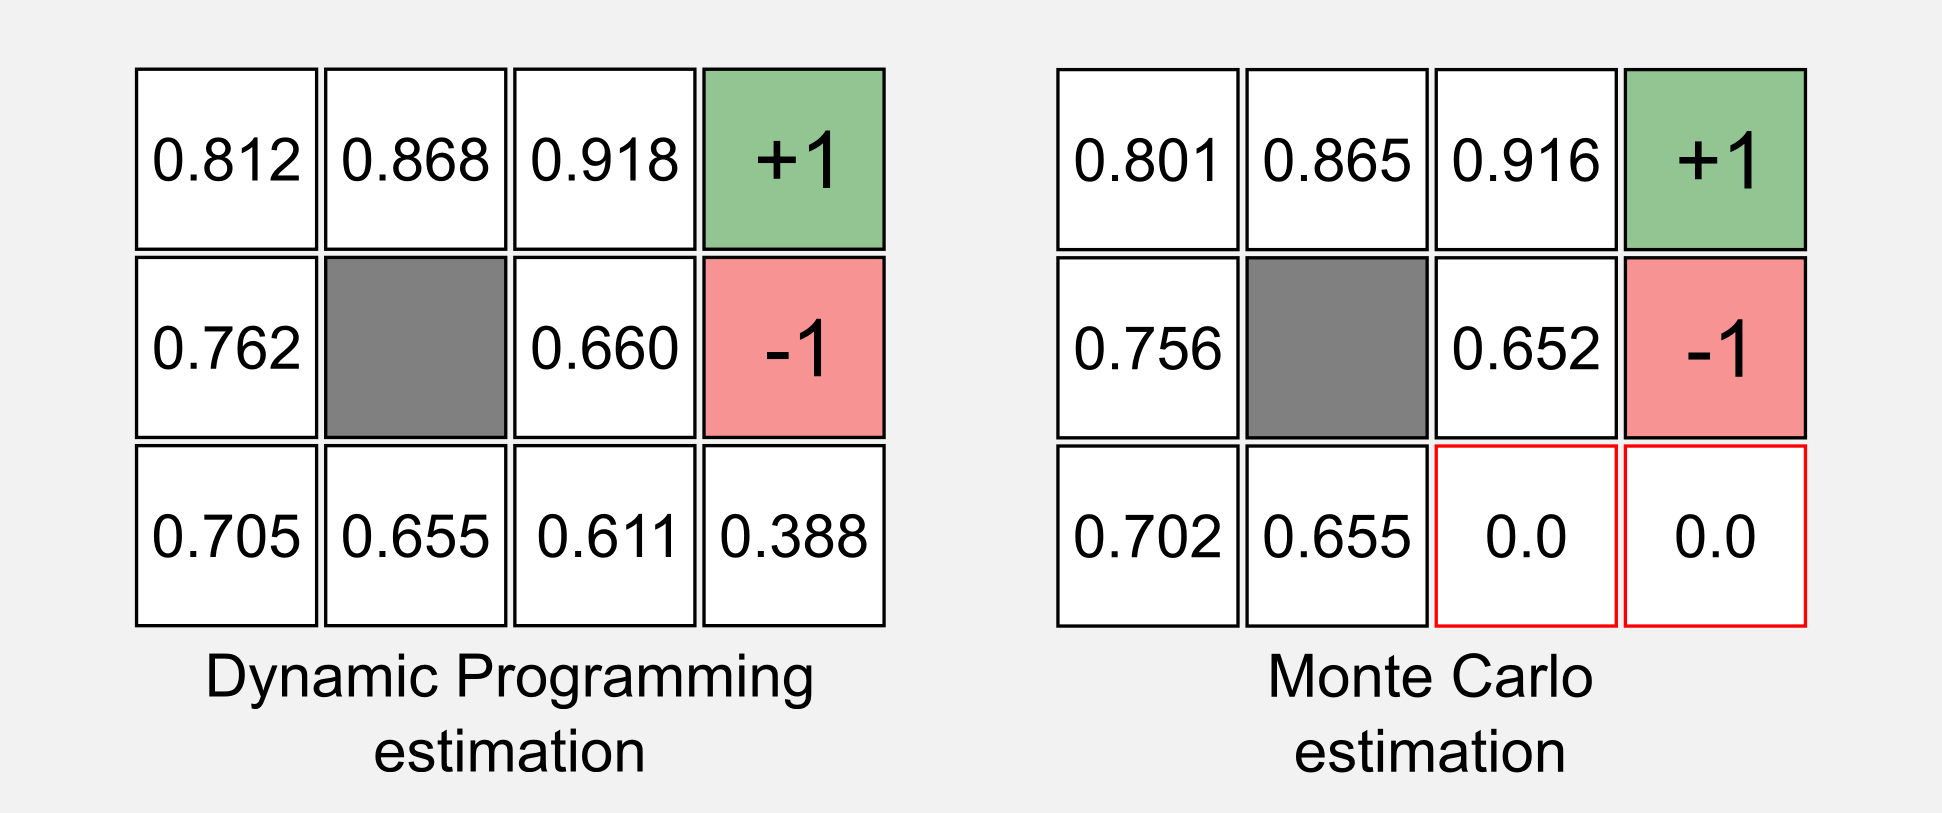

If you observe the two utility matrices you will notice many similarities but two important differences. The utility estimations for the states (4,1) and (3,1) are equal to zero. This can be considered one of the limitations and at the same time one of the advantage of MC methods. The policy we are using, the transition probabilities, and the fact that the robot always start from the same position (bottom-left corner) are responsible for the wrong estimate in those states. Starting from the state (1,1) the robot will never reach those states and it cannot estimate the corresponding utilities. As I told you this is a problem because we cannot estimate those values but at the same time it is an advantage. In a very big grid world we can estimate the utilities only for the states we are interested in, saving time and resources and focusing only on a particular subspace of the world.